# Importing Libraries

In [65]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [50]:
# Step 2: Load the Dataset
data = pd.read_csv('Healthcare_Clustering_Dataset.csv')


# Exploratory Data Analysis

In [52]:
data.head()

,Age,BMI,BloodPressure,Cholesterol,HeartRate,BloodSugar,Hemoglobin,DiseaseRiskScore,HospitalVisits,Region
0,56.0,34.3,161.0,263.7,85.0,154.5,12.8,47.6,6.0,Semi-Urban
1,69.0,15.3,176.0,196.0,104.0,81.8,10.4,93.3,13.0,Urban
2,46.0,30.0,127.0,212.2,113.0,193.2,10.2,7.6,13.0,Urban
3,32.0,29.1,95.0,256.9,106.0,103.6,14.4,50.1,4.0,Urban
4,60.0,32.9,175.0,207.9,118.0,113.8,16.1,68.7,2.0,Semi-Urban


In [54]:
data.tail()

,Age,BMI,BloodPressure,Cholesterol,HeartRate,BloodSugar,Hemoglobin,DiseaseRiskScore,HospitalVisits,Region
1495,22.0,39.3,110.0,177.9,106.0,114.7,15.4,72.7,13.0,Urban
1496,46.0,21.6,153.0,292.6,77.0,106.0,14.6,37.1,5.0,Semi-Urban
1497,64.0,21.8,179.0,NaN,72.0,199.6,17.6,18.4,0.0,Urban
1498,21.0,26.8,125.0,189.1,NaN,167.6,13.5,44.3,9.0,Urban
1499,29.0,39.6,175.0,295.4,60.0,153.8,NaN,16.6,8.0,Urban


In [56]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1421 non-null   float64
 1   BMI               1423 non-null   float64
 2   BloodPressure     1429 non-null   float64
 3   Cholesterol       1421 non-null   float64
 4   HeartRate         1425 non-null   float64
 5   BloodSugar        1441 non-null   float64
 6   Hemoglobin        1418 non-null   float64
 7   DiseaseRiskScore  1430 non-null   float64
 8   HospitalVisits    1434 non-null   float64
 9   Region            1500 non-null   object 
dtypes: float64(9), object(1)
memory usage: 117.3+ KB


In [58]:
# Check for Missing Val
data.isnull().sum()

Age                 79
BMI                 77
BloodPressure       71
Cholesterol         79
HeartRate           75
BloodSugar          59
Hemoglobin          82
DiseaseRiskScore    70
HospitalVisits      66
Region               0
dtype: int64

In [313]:
data.describe()

,Age,BMI,BloodPressure,Cholesterol,HeartRate,BloodSugar,Hemoglobin,DiseaseRiskScore,HospitalVisits,Region
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,49.199156,27.501476,134.755073,224.878395,84.489825,134.186329,13.879972,49.980629,7.003487,0.988000
std,17.603153,7.041775,24.748047,42.347551,19.787532,36.391325,2.212725,28.061581,4.328797,0.828843
min,18.000000,15.000000,90.000000,150.000000,50.000000,70.000000,10.000000,0.000000,0.000000,0.000000
25%,35.000000,21.400000,114.000000,189.875000,68.000000,103.675000,12.000000,26.300000,3.000000,0.000000
50%,49.199156,27.501476,134.755073,224.878395,84.489825,134.186329,13.879972,49.980629,7.000000,1.000000
75%,64.000000,33.500000,155.000000,261.125000,101.000000,164.225000,15.700000,73.700000,11.000000,2.000000
max,79.000000,40.000000,179.000000,299.600000,119.000000,199.900000,18.000000,100.000000,14.000000,2.000000


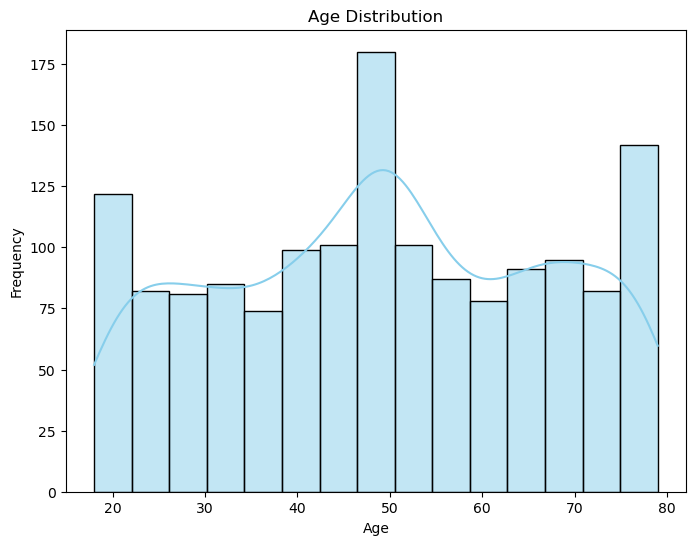

In [314]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

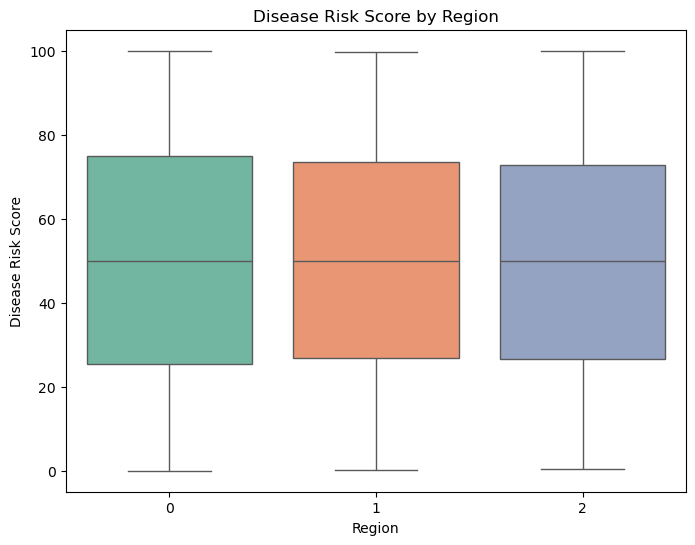

In [315]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='DiseaseRiskScore', data=data, palette='Set2')
plt.title('Disease Risk Score by Region')
plt.xlabel('Region')
plt.ylabel('Disease Risk Score')
plt.show()

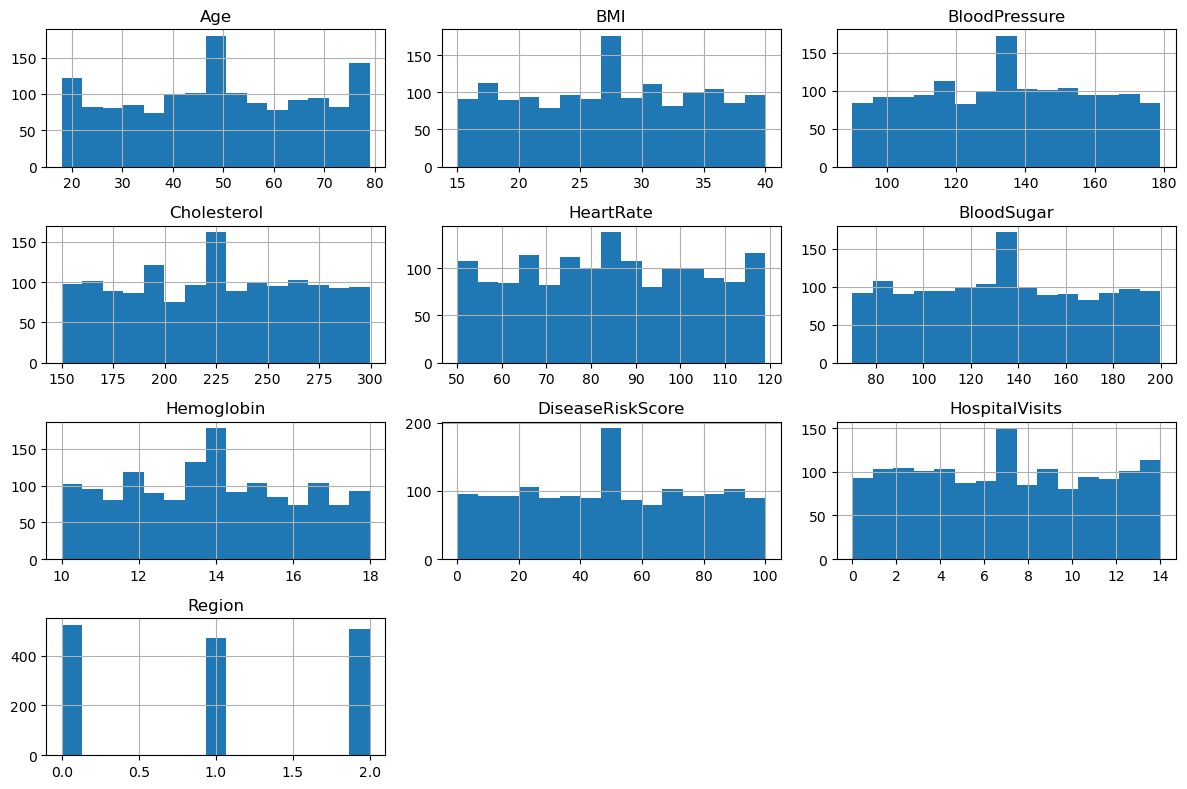

In [316]:
#  Plot Histogram of all features
data.hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

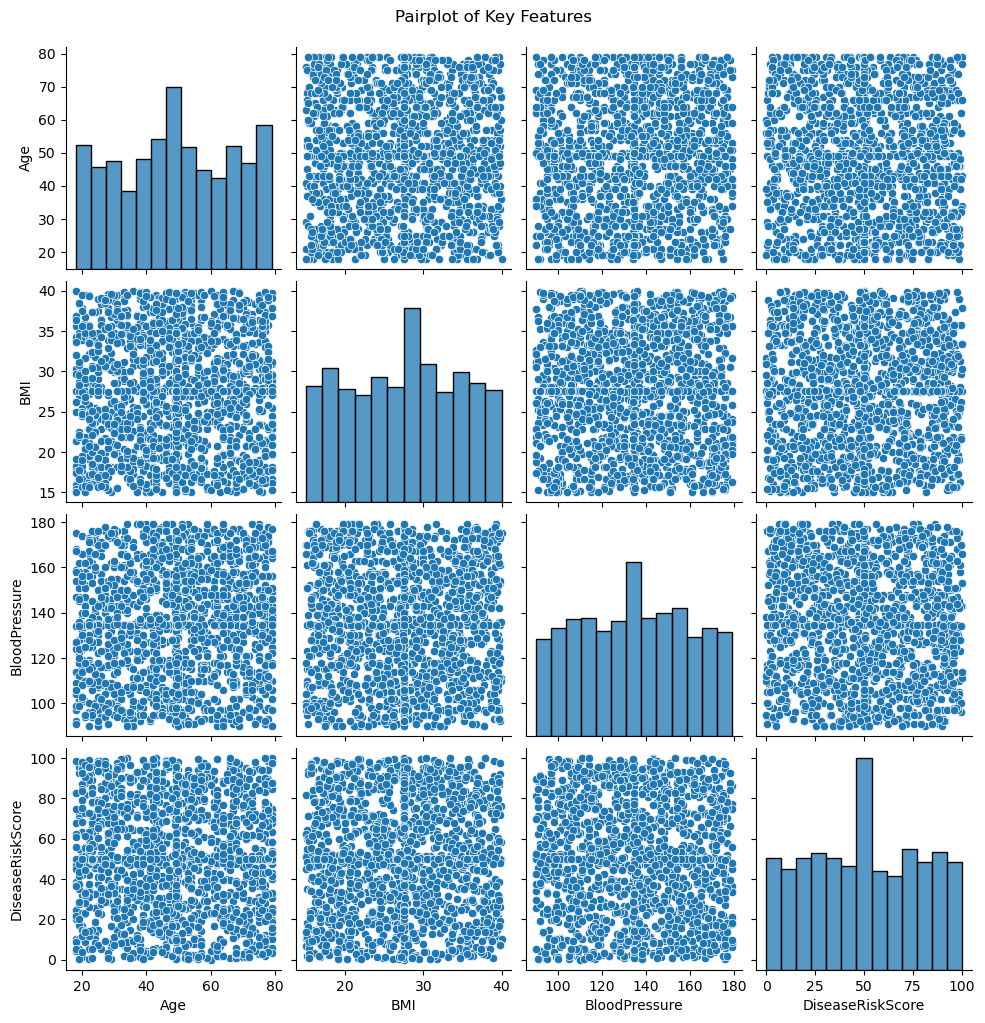

In [317]:
#Pairplot
sns.pairplot(data[['Age', 'BMI', 'BloodPressure', 'DiseaseRiskScore']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

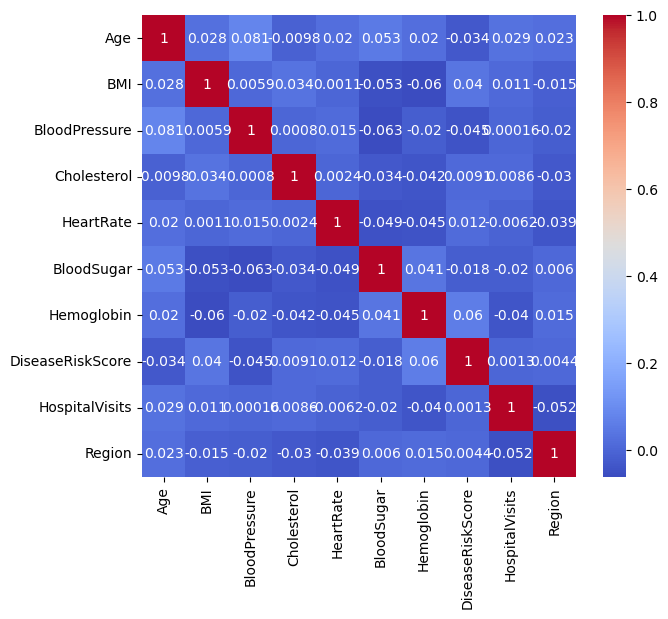

In [318]:
#  Plot Heatmap for Correlation Matrix (numeric data only)
# Select only the numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(7, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing 

In [15]:
#  Handle Missing Values by Filling with Mean (for numeric columns only)
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [17]:
#  Verify that there are no remaining missing values
print("Missing values after filling:\n", data.isnull().sum())


Missing values after filling:
 Age                 0
BMI                 0
BloodPressure       0
Cholesterol         0
HeartRate           0
BloodSugar          0
Hemoglobin          0
DiseaseRiskScore    0
HospitalVisits      0
Region              0
dtype: int64


In [19]:
# Encode Non-Numeric Features
# Check for non-numeric columns and encode them
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [21]:
#  Standardize the Data (Scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [320]:
# Feature Selection through Correlation Analysis.
# Drop highly correlated features (absolute correlation > 0.85)
correlated_features = set()
correlation_threshold = 0.85

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

data_filtered = data.drop(columns=correlated_features)

In [321]:

# Outlier Removal using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
lof_labels = lof.fit_predict(data_filtered[numerical_columns])
data_cleaned_lof = data_filtered[lof_labels == 1]

# Clusturing Algorithms

# 1) K-Means Clusturing

In [322]:
#  apply K-Means Clustering
range_n_clusters = range(2, 11)
silhouette_scores = []
inertia = []
optimal_k = 0
max_silhouette_score = 0

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(score)
    if score > max_silhouette_score:
        max_silhouette_score = score
        optimal_k = k


In [323]:
#  Finalize K-Means with Optimal Clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(data_pca)
final_silhouette = silhouette_score(data_pca, final_labels)


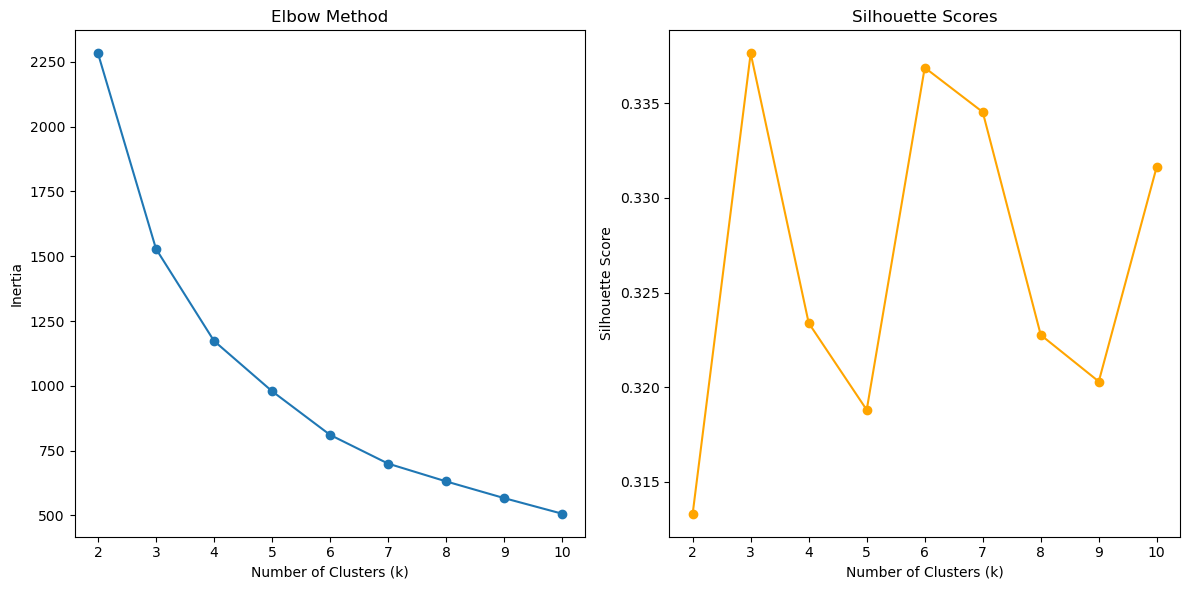

In [324]:
# Visualize Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

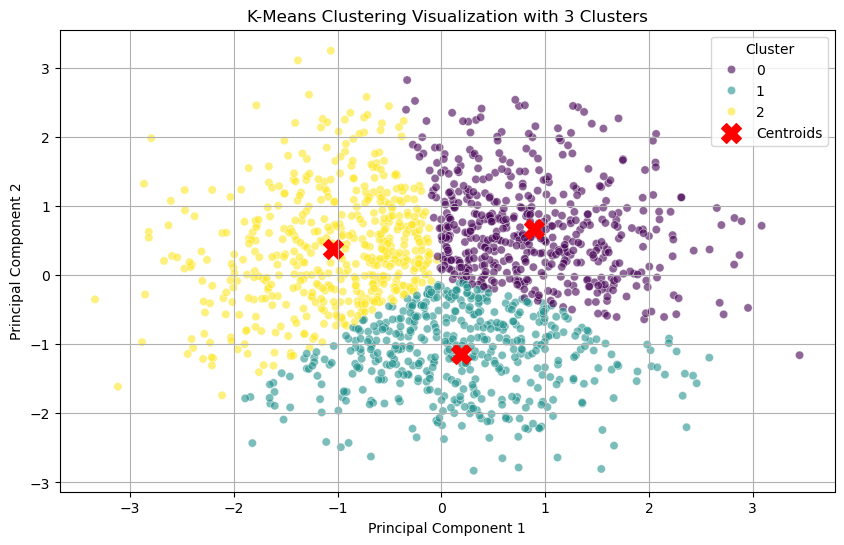

In [325]:
# Visualize Final Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_pca[:, 0], y=data_pca[:, 1], hue=final_labels,
    palette='viridis', legend='full', alpha=0.6
)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title(f"K-Means Clustering Visualization with {optimal_k} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()

In [326]:

# Print Final Silhouette Score
print(f"Final Silhouette Score: {final_silhouette:.2f}")

Final Silhouette Score: 0.34


# 2) Hierarchical Clusturing

In [25]:
# Remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outlier_labels = iso_forest.fit_predict(scaled_data)
cleaned_data = scaled_data[outlier_labels == 1]

#  Apply t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(cleaned_data)

# Apply Agglomerative Clustering on t-SNE-transformed data
hierarchical_tsne = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchical_labels_tsne = hierarchical_tsne.fit_predict(data_tsne)


In [26]:

#  Apply Agglomerative Clustering on t-SNE-transformed data
hierarchical_tsne = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchical_labels_tsne = hierarchical_tsne.fit_predict(data_tsne)


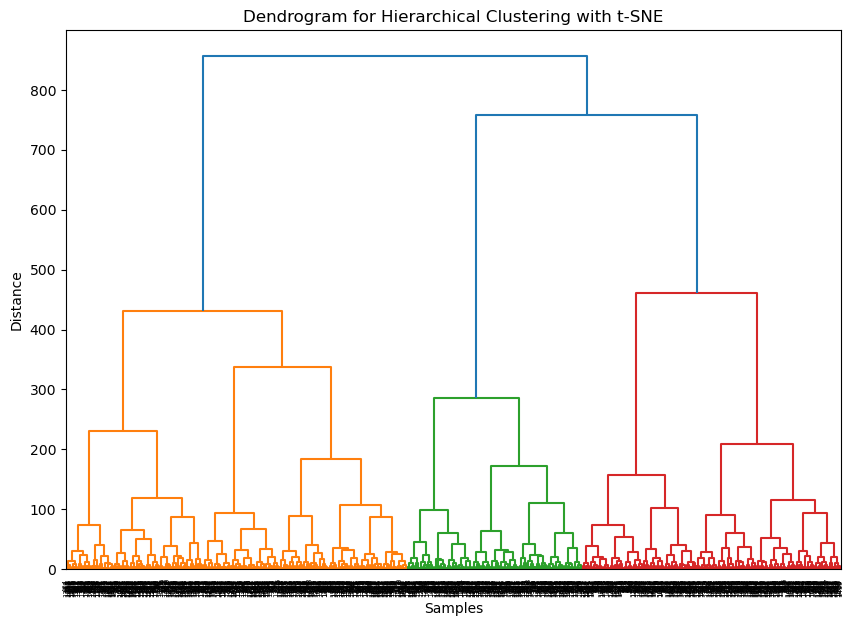

In [27]:

#  Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(data_tsne, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering with t-SNE')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


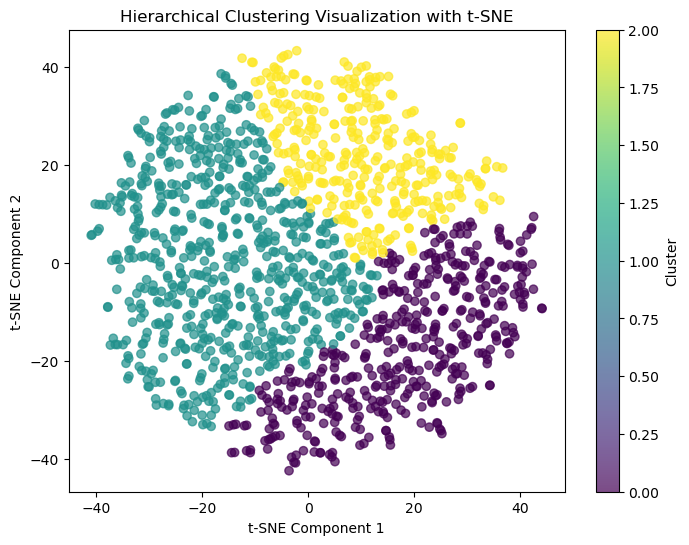

In [28]:
# Step 7: Visualize Clusters for Hierarchical Clustering with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=hierarchical_labels_tsne, cmap='viridis', alpha=0.7)
plt.title('Hierarchical Clustering Visualization with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [29]:

# Step 5: Calculate Silhouette Score
hierarchical_tsne_silhouette_score = silhouette_score(data_tsne, hierarchical_labels_tsne)
print(f"Silhouette Score with t-SNE for Hierarchical Clustering: {hierarchical_tsne_silhouette_score:.2f}")

Silhouette Score with t-SNE for Hierarchical Clustering: 0.32
